Author: Rezky Ivan

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/rakamin/loan_customer.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [ ]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [ ]:
nums = ['birth_date', 'phone_number', 'dependents', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']
cats = ['loan_id', 'gender', 'married', 'education', 'self_employed', 'has_credit_card', 'property_type', 'loan_status']

# Data Cleansing

## Handling missing values

In [ ]:
df.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64

## Handling duplicated data

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0
0


## Handling Outlier

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in ['phone_number','applicant_income', 'coapplicant_income', 'credit_history']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 52
Jumlah baris setelah memfilter outlier: 33


## Feature Encoding

In [ ]:
cats_updated = ['gender', 'married', 'education', 'self_employed', 'has_credit_card', 'property_type', 'loan_status']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column gender
Male      29
Female     4
Name: gender, dtype: int64
------------------------------ 

value counts of column married
Yes    22
No     11
Name: married, dtype: int64
------------------------------ 

value counts of column education
Graduate        23
Not Graduate    10
Name: education, dtype: int64
------------------------------ 

value counts of column self_employed
No     28
Yes     5
Name: self_employed, dtype: int64
------------------------------ 

value counts of column has_credit_card
no     19
yes    14
Name: has_credit_card, dtype: int64
------------------------------ 

value counts of column property_type
apartment    15
house        11
studio        7
Name: property_type, dtype: int64
------------------------------ 

value counts of column loan_status
APPROVE    28
REJECT      5
Name: loan_status, dtype: int64
------------------------------ 



# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [ ]:
df.dtypes

loan_id                object
birth_date             object
phone_number          float64
gender                 object
married                object
dependents             object
education              object
self_employed          object
applicant_income      float64
coapplicant_income    float64
loan_amount             int64
loan_term_month         int64
loan_term_year          int64
credit_history        float64
has_credit_card        object
property_type          object
loan_status            object
dtype: object

In [ ]:
n_by_state = df.groupby("gender")["loan_amount"].count()
n_by_state.head(10)

gender
Female     4
Male      29
Name: loan_amount, dtype: int64

In [ ]:
df.groupby(["property_type", "married"], as_index=False)["loan_amount"].count()

,property_type,married,loan_amount
0,apartment,No,4
1,apartment,Yes,11
2,house,No,5
3,house,Yes,6
4,studio,No,2
5,studio,Yes,5


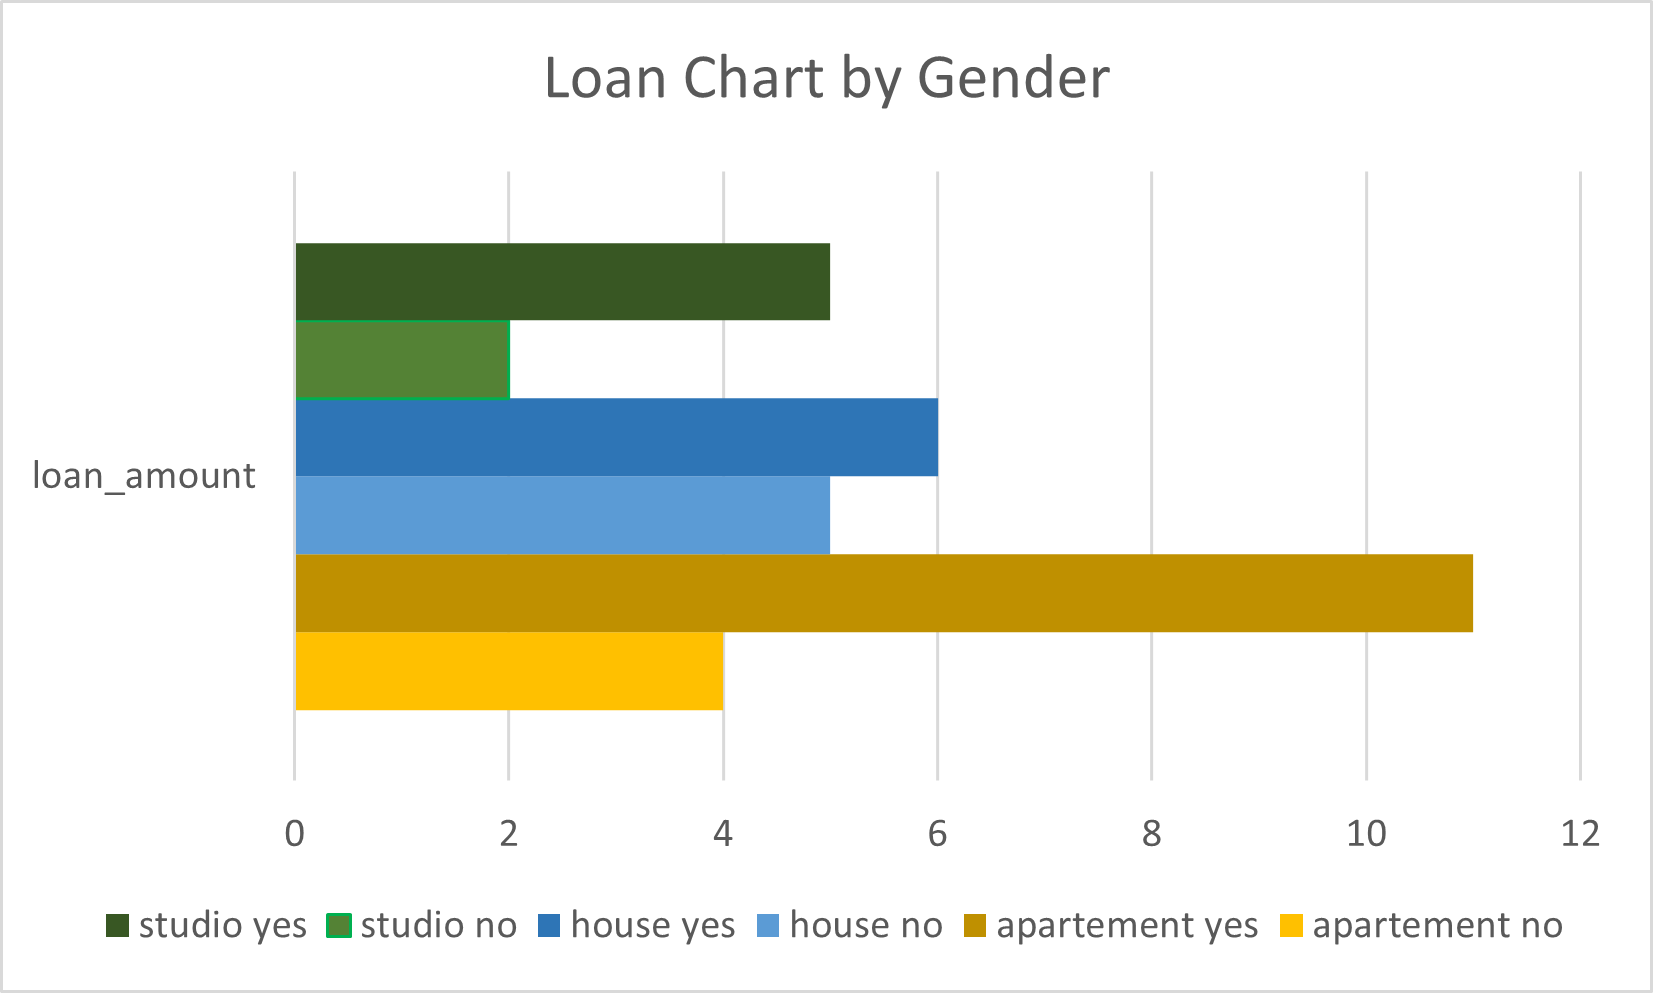

### Analisis pengaruh status perkawinan terhadap banyaknya jumlah pinjaman

peminjam yang sudah menikah cenderung lebih banyak meminjam dan jumlah pinjaman terbanyak terdapat pada pinjaman apartemen